In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/Credit_Card_Fraud.csv")# Assuming the filename

# a. Check for NULL values
print(df.isnull().sum())

# b. Derive 'Age' from 'dob'
df['dob'] = pd.to_datetime(df['dob'])

def calculate_age(dob):
    today = pd.to_datetime('today')
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function
df['Age'] = df['dob'].apply(calculate_age)

# Check
print(df[['dob', 'Age']].head())
# c. Shape of DataFrame
print(df.shape)


trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
         dob  Age
0 1978-06-21   46
1 1962-01-19   63
2 1945-12-21   79
3 1967-08-30   57
4 1967-08-02   57
(339607, 16)


In [ ]:
fraud_df = df[df['is_fraud'] == 1]
merchant_fraud_count = fraud_df.groupby(['merchant', 'dob']).size().reset_index(name='Fraud_Count')
print(merchant_fraud_count)


                    merchant        dob  Fraud_Count
0              Abbott-Rogahn 1983-06-13            1
1              Abbott-Rogahn 1989-07-17            1
2              Abbott-Steube 1986-11-24            1
3         Abernathy and Sons 1940-09-13            1
4         Abernathy and Sons 1976-09-17            1
...                      ...        ...          ...
1755            Zemlak Group 1972-07-18            1
1756          Ziemann-Waters 1992-05-09            1
1757  Zieme, Bode and Dooley 1955-05-06            1
1758  Zieme, Bode and Dooley 1974-12-23            1
1759              Zulauf LLC 1975-07-31            1

[1760 rows x 3 columns]


In [ ]:
welch_fraud = fraud_df[fraud_df['merchant'] == 'Welch Inc']
print(welch_fraud)


       trans_date_trans_time   merchant  category     amt         city state  \
50781    2019-05-16 23:54:36  Welch Inc  misc_net  803.64     Campbell    NE   
53091    2019-05-22 02:26:28  Welch Inc  misc_net  828.47  Smith River    CA   
64644    2019-06-14 03:26:43  Welch Inc  misc_net  819.53     San Jose    CA   
66774    2019-06-17 13:45:25  Welch Inc  misc_net  650.50     Syracuse    MO   
182862   2020-02-10 23:17:42  Welch Inc  misc_net  709.61        Sixes    OR   
182883   2020-02-10 23:58:42  Welch Inc  misc_net  764.72        Sixes    OR   
213931   2020-05-01 22:14:21  Welch Inc  misc_net  806.06    Louisiana    MO   
282464   2020-09-17 22:41:50  Welch Inc  misc_net  898.89     Palmdale    CA   

            lat      long  city_pop                       job        dob  \
50781   40.2967  -98.7370       493        Surveyor, minerals 1940-09-13   
53091   41.9404 -124.1587      1930              Web designer 1983-06-13   
64644   37.3304 -121.7913    973849              Ge

In [ ]:
rcg_fraud = fraud_df[fraud_df['merchant'] == 'Romaguera, Cruickshank and Greenholt']
print(rcg_fraud)


       trans_date_trans_time                              merchant  \
8785     2019-01-28 23:14:49  Romaguera, Cruickshank and Greenholt   
23618    2019-03-11 23:03:05  Romaguera, Cruickshank and Greenholt   
56835    2019-05-29 20:54:14  Romaguera, Cruickshank and Greenholt   
98936    2019-08-19 00:45:59  Romaguera, Cruickshank and Greenholt   
108562   2019-09-07 23:52:10  Romaguera, Cruickshank and Greenholt   
169998   2019-12-31 22:17:45  Romaguera, Cruickshank and Greenholt   
186787   2020-02-23 23:40:47  Romaguera, Cruickshank and Greenholt   
194450   2020-03-15 23:59:54  Romaguera, Cruickshank and Greenholt   
206486   2020-04-13 16:49:02  Romaguera, Cruickshank and Greenholt   
258992   2020-07-31 23:08:01  Romaguera, Cruickshank and Greenholt   
259013   2020-07-31 23:49:08  Romaguera, Cruickshank and Greenholt   
282154   2020-09-16 20:58:06  Romaguera, Cruickshank and Greenholt   
282468   2020-09-17 23:03:36  Romaguera, Cruickshank and Greenholt   
287194   2020-09-28 

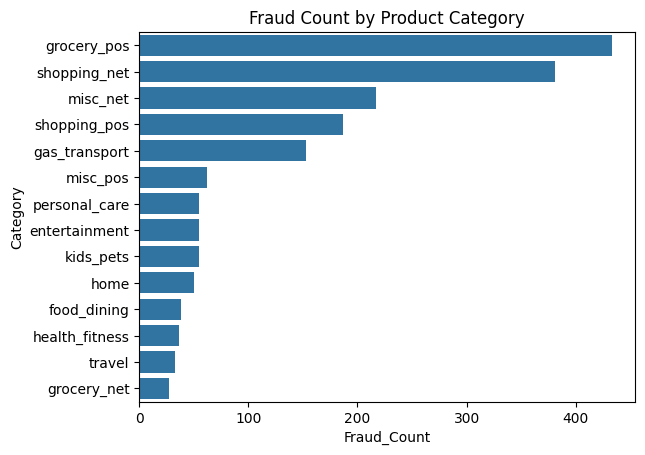

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category_fraud_count = fraud_df['category'].value_counts().reset_index()
category_fraud_count.columns = ['Category', 'Fraud_Count']

sns.barplot(x='Fraud_Count', y='Category', data=category_fraud_count)
plt.title('Fraud Count by Product Category')
plt.show()


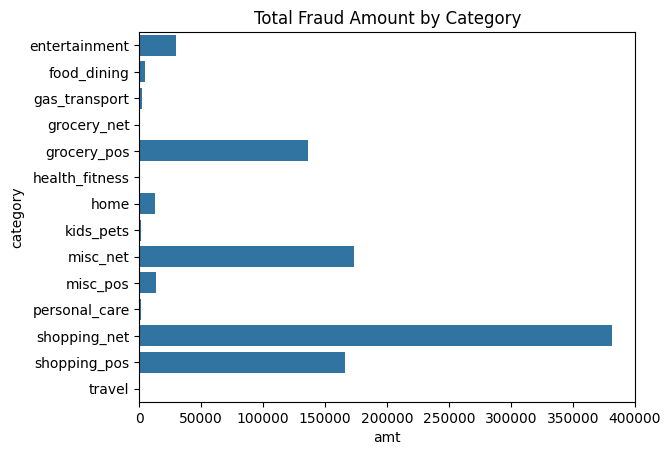

In [ ]:
fraud_amount_by_category = fraud_df.groupby('category')['amt'].sum().reset_index()

sns.barplot(x='amt', y='category', data=fraud_amount_by_category)
plt.title('Total Fraud Amount by Category')
plt.show()


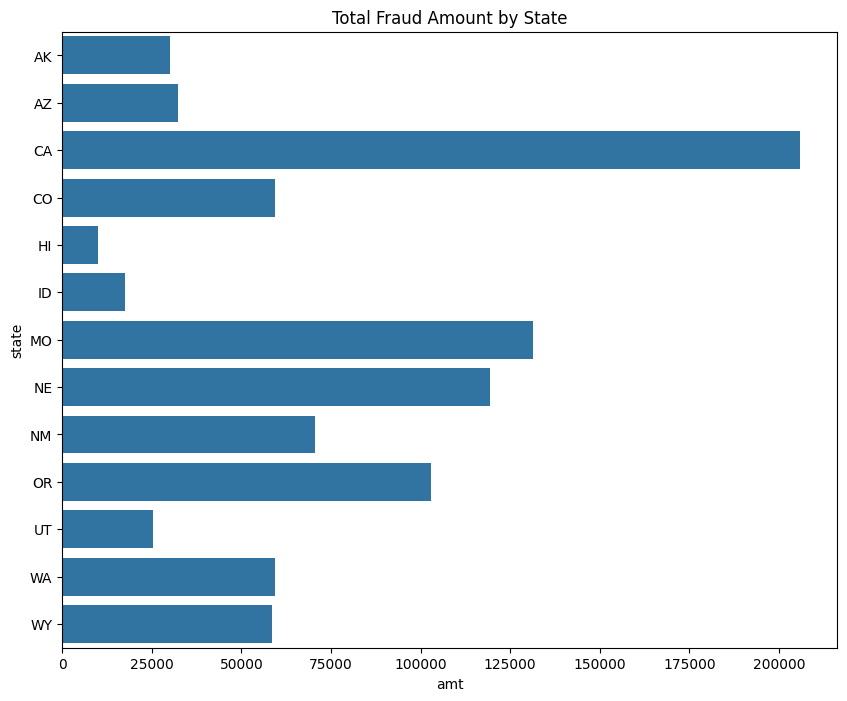

In [ ]:
fraud_amount_by_state = fraud_df.groupby('state')['amt'].sum().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(x='amt', y='state', data=fraud_amount_by_state)
plt.title('Total Fraud Amount by State')
plt.show()


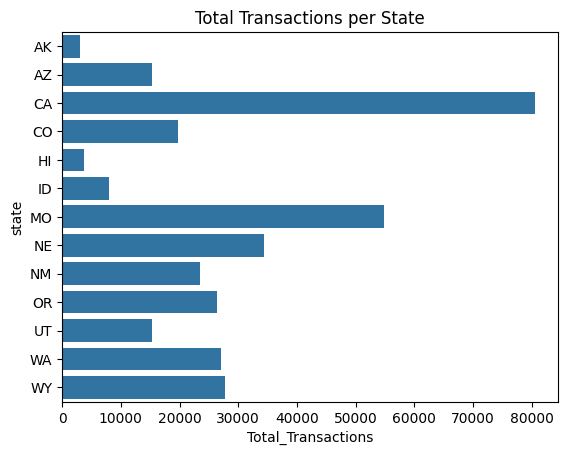

In [ ]:
total_transactions_state = df.groupby('state').size().reset_index(name='Total_Transactions')

sns.barplot(x='Total_Transactions', y='state', data=total_transactions_state)
plt.title('Total Transactions per State')
plt.show()


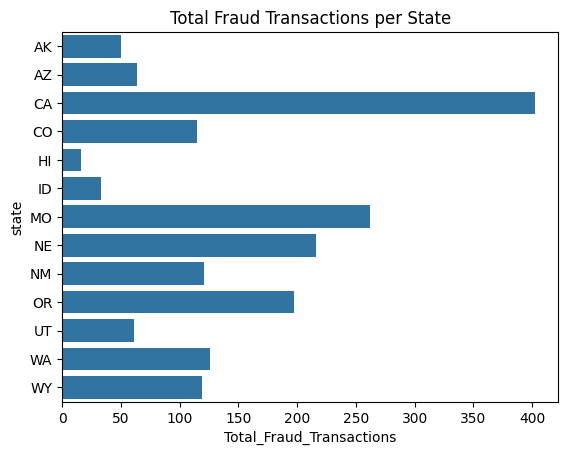

In [ ]:
fraud_transactions_state = fraud_df.groupby('state').size().reset_index(name='Total_Fraud_Transactions')

sns.barplot(x='Total_Fraud_Transactions', y='state', data=fraud_transactions_state)
plt.title('Total Fraud Transactions per State')
plt.show()


In [ ]:
merged = pd.merge(total_transactions_state, fraud_transactions_state, on='state', how='left')
merged['Total_Fraud_Transactions'] = merged['Total_Fraud_Transactions'].fillna(0)
print(merged)


   state  Total_Transactions  Total_Fraud_Transactions
0     AK                2963                        50
1     AZ               15362                        64
2     CA               80495                       402
3     CO               19766                       115
4     HI                3649                        16
5     ID                8035                        33
6     MO               54904                       262
7     NE               34425                       216
8     NM               23427                       121
9     OR               26408                       197
10    UT               15357                        61
11    WA               27040                       126
12    WY               27776                       119


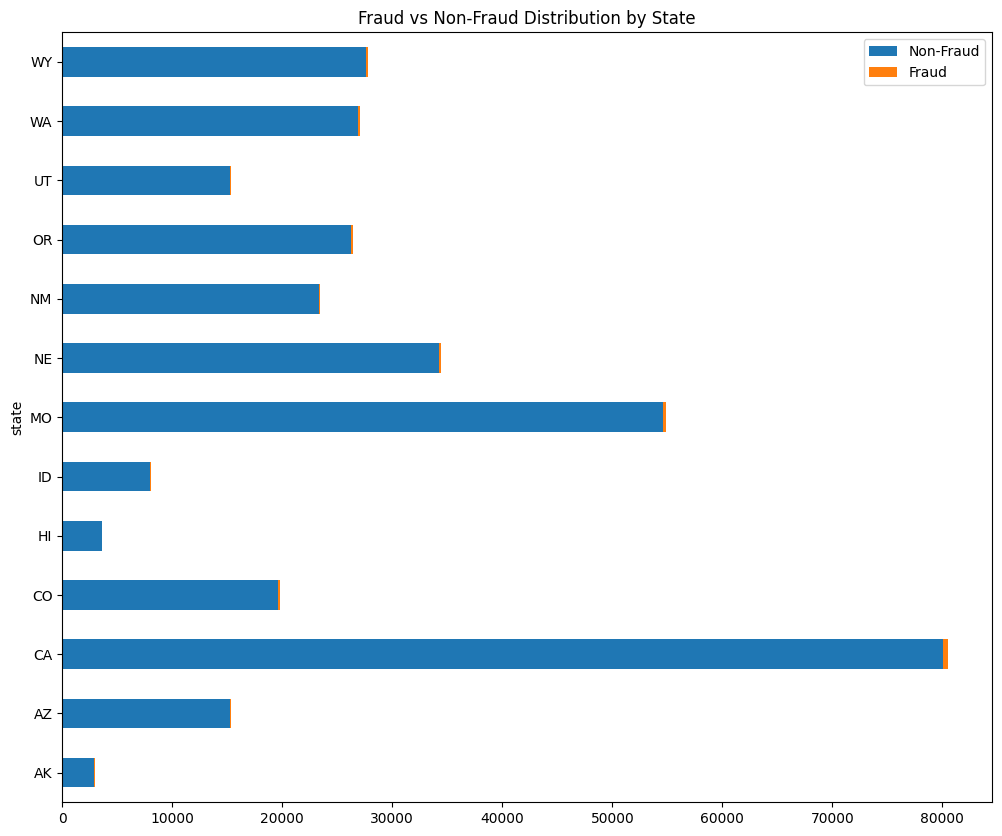

In [ ]:
# Create fraud/non-fraud counts
fraud_distribution = df.groupby(['state', 'is_fraud']).size().unstack().fillna(0)
fraud_distribution.columns = ['Non-Fraud', 'Fraud']

fraud_distribution.plot(kind='barh', stacked=True, figsize=(12,10))
plt.title('Fraud vs Non-Fraud Distribution by State')
plt.show()


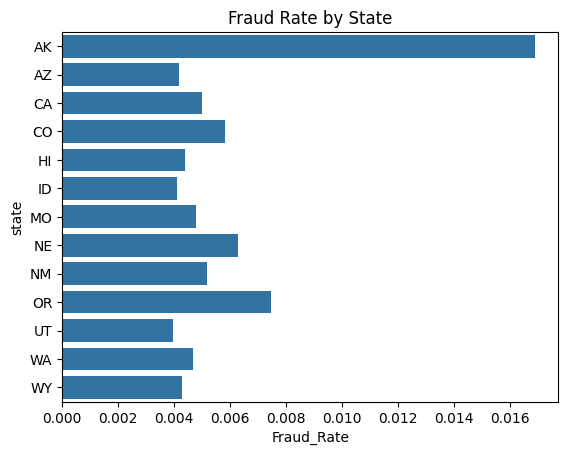

In [ ]:
merged['Fraud_Rate'] = merged['Total_Fraud_Transactions'] / merged['Total_Transactions']

sns.barplot(x='Fraud_Rate', y='state', data=merged)
plt.title('Fraud Rate by State')
plt.show()
